Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,392 (411.69 KB)

 Trainable params: 105,392 (411.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.3705 - val_loss: 0.1774
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1682 - val_loss: 0.1430
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1401 - val_loss: 0.1286
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1280 - val_loss: 0.1207
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1211 - val_loss: 0.1153
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1160 - val_loss: 0.1116
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1127 - val_loss: 0.1094
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1104 - val_loss: 0.1068
Epoch 9/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1080 - val_loss: 0.1046
Epoch 10/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1052 - val_loss: 0.1026
Epoch 11/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1037 - val_loss: 0.1015
Epoch 12/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step

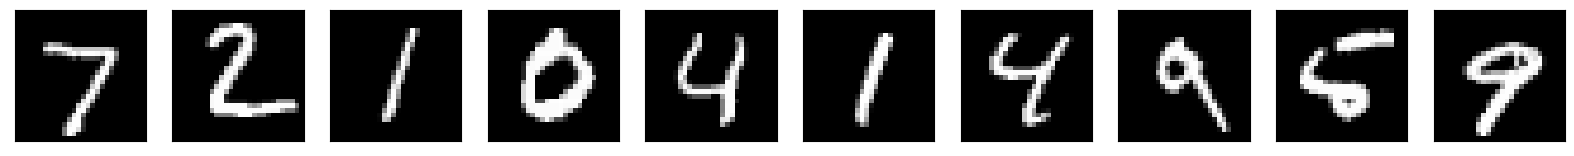

In [6]:
import numpy as np
import tensorflow as tf
from keras.api.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

from keras.api.models import Sequential, Model
from keras.api.layers import Input, Dense

input1 = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input1)

bottleneck = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(bottleneck)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input1, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

autoencoder.fit(x_train, x_train, epochs=25, batch_size=256, shuffle=True, validation_data=(x_test, x_test))



import matplotlib.pyplot as plt
reconstructed = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+1)
    plt.imshow(reconstructed[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    




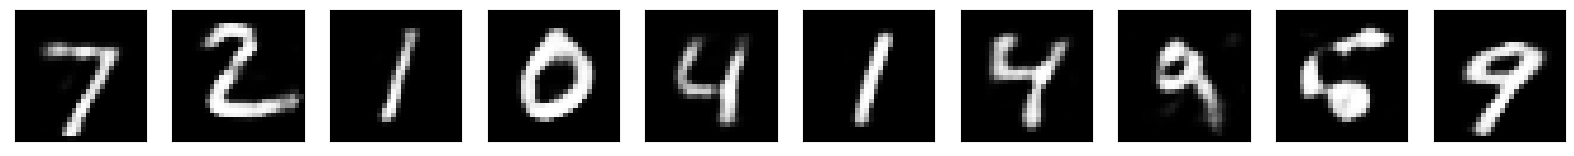

In [5]:
n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
    
    ax = plt.subplot(2, n, i+1)
    plt.imshow(reconstructed[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [7]:
for layer in autoencoder.layers[-4:]:
    layer.trainable = True
    
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(
    x_train, x_train, epochs=25, batch_size=256, shuffle=True, validation_data=(x_test, x_test)
)




Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0958 - val_loss: 0.0926
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0936 - val_loss: 0.0921
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0932 - val_loss: 0.0920
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0929 - val_loss: 0.0916
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0928 - val_loss: 0.0917
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0924 - val_loss: 0.0914
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0923 - val_loss: 0.0911
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0921 - val_loss: 0.0909
Epoch 9/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0918 - val_loss: 0.0908
Epoch 10/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0917 - val_loss: 0.0906
Epoch 11/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0917 - val_loss: 0.0906
Epoch 12/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 5

Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1197 - val_loss: 0.1184
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1190 - val_loss: 0.1182
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1186 - val_loss: 0.1183
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1188 - val_loss: 0.1182
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1183 - val_loss: 0.1183
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1184 - val_loss: 0.1183
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1181 - val_loss: 0.1183
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1179 - val_loss: 0.1182
Epoch 9/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1184 - val_loss: 0.1181
Epoch 10/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1181 - val_loss: 0.1179
Epoch 11/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1178 - val_loss: 0.1183
Epoch 12/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9

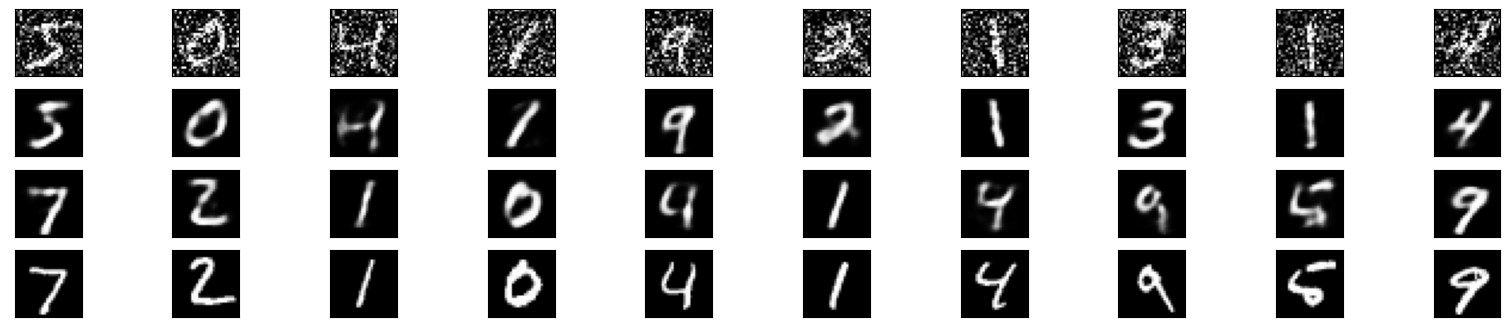

In [10]:
import numpy as np
import matplotlib.pyplot as plt

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

autoencoder.fit(x_train_noisy, x_train, batch_size= 256, epochs = 25, shuffle=True, validation_data=(x_test_noisy, x_test))

n = 10
plt.figure(figsize=(20, 4))

reconstructed_noisy2 = autoencoder.predict(x_train_noisy)
reconstructed_noisy = autoencoder.predict(x_test_noisy)

for i in range(n):
    ax = plt.subplot(4, n, i+1)
    plt.imshow(x_train_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(4, n, i+1+n)
    plt.imshow(reconstructed_noisy2[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(4, n, i+1+n+n)
    plt.imshow(reconstructed_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(4, n, i+1+n+n+n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
    
    
    
    

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


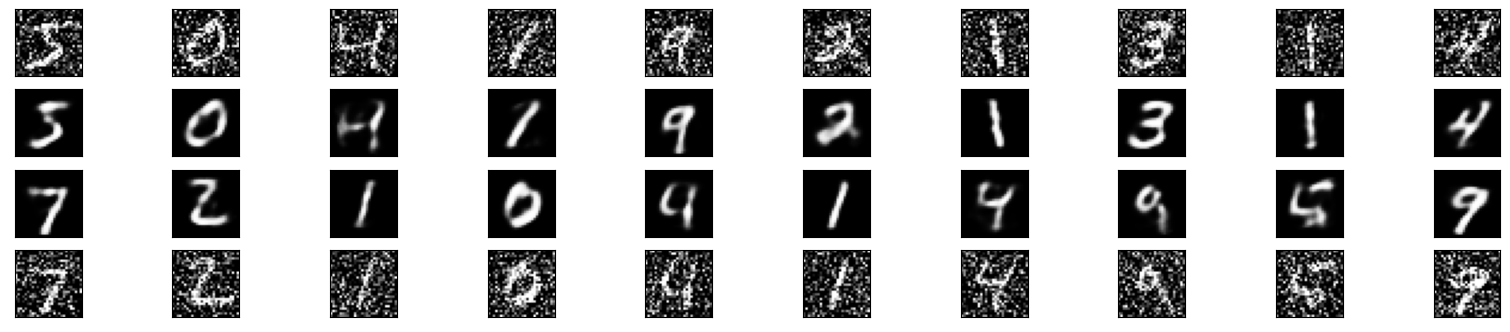

In [11]:
n = 10
plt.figure(figsize=(20, 4))

reconstructed_noisy2 = autoencoder.predict(x_train_noisy)
reconstructed_noisy = autoencoder.predict(x_test_noisy)

for i in range(n):
    ax = plt.subplot(4, n, i+1)
    plt.imshow(x_train_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(4, n, i+1+n)
    plt.imshow(reconstructed_noisy2[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(4, n, i+1+n+n)
    plt.imshow(reconstructed_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(4, n, i+1+n+n+n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()